# ML applied to Gaussian mixtures

Finding the maximum likelihood estimator becomes trickier when our data comes from a complex function of many parameters. A particular case of a reasonably complex likelihood that can still be maximized using a relatively straightforward numerical method is a mixture of Gaussians. As the name suggests, these models assume all the data points are generated from a combination of a finite number of normal distributions with unknown parameters. First, we'll define the model and then discuss how to go about maximizing the likelihood.

## Gaussian mixture model

For a mixture of $M$ Gaussian distributions, we can write the likelihood for a single datum $x_i$ as

$$\qquad \qquad \qquad p(x_i|\boldsymbol{\theta}) = \sum^M_{j=1} \alpha_j \mathcal{N}(\mu_j,\sigma_j). \qquad \qquad \qquad (1)$$

Note that the data $x = \{x_1,...,x_N\}$ are still assumed to be independent and identically distributed. The vector of parameters $\boldsymbol{\theta}$ contains the weights (the contribution of each distribution to the mixture), means, and standard deviations for each distribution $M$. The weights have the property that each is a value between 0 and 1, and they must satisfy the normalization constraint

$$\sum_{j=1}^M \alpha_j = 1.$$

Again, we can work with the natural log of equation $(1)$, which becomes

$$\ln{L} = \sum_{i=1}^N \ln\bigg[\sum_{j=1}^M \alpha_j\mathcal{N}(\mu_j,\sigma_j)\bigg].$$

To solve this, we would need to take the partial derivatives on $\ln{L}$ with respect to each parameter

$$ \frac{\partial \ln{L}}{\partial \mu_j} =  \frac{\partial \ln{L}}{\partial \sigma_j} = \frac{\partial \ln{L}}{\partial \alpha_j} = 0$$

which would result in a complex system of $(3M −1)$ nonlinear equations, not bring us much closer to the solution. No fear! A fast procedure is available, especially for the case of large $M$, based on the concept of hidden variables, as described in the next section.

## Class labels and hidden variables

To simplify our problem, we can think of our likelihood in terms of *hidden variables*. Suppose $M$ Gaussian components are thought of as being different classes, meaning that a particular datum $x_i$ was generated by only *one* of the individual Gaussian components. In that case, the index $j$ is called a "class label." Thus, the $j$ responsible for generating each $x_i$ is the hidden variable. If we knew the class label for each datum, we could maximize it as we did in the previous section based on a single Gaussian distribution. That is, all the data could be sorted into $M$ subsamples according to their class label. $\mu_j$ and $\sigma_j$ would be found using equation $3.31$ and $3.32$ in the textbook, and the fraction of points in each subsample would be an estimator of $\alpha_j$.

Unfortunately, the class labels are not known, but we can determine the probability that a particular datum was generated by class $j$ using Bayes rule,

$$p(j | x_i) = \frac{p(x_i | j) p(j)}  {\sum_{j=1}^M p(x_i | j) p(j)}.$$

$p(x_i|j)$ is our Gaussian distribution, and $p(j) = \alpha_j$ since $\alpha_j$ is the fraction of data drawn from Gaussian $j$. Thus, we can rewrite this equation as 

$$ \qquad \qquad \qquad p(j|x_i) = \frac{\alpha_j \mathcal{N}(\mu_j,\sigma_j)}{\sum^M_{j=1}\alpha_j\mathcal{N}(\mu_j,\sigma_j)}. \qquad \qquad \qquad (2)$$

The class probability $p(j|x_i)$ is small when $x_i$ is not within a few $\sigma_j$ from $\mu_j$. Note that $\sum^M_{j=1} p(j|x_i)=1 $

## The basics of the expectation maximization algorithm

Interpreting equation $(1)$ in terms of hidden variables and class labels yields the expectation maximization (EM) algorithm, which can be used to maximize our Gaussian mixture easily. The critical component of the 
iterative EM algorithm is the assumption that **the class probability $p(j|x_i)$ is known and fixed in each iteration.**

The EM algorithm is not limited to Gaussian mixtures, so instead of $\mathcal{N}(\mu_j,\sigma_j)$ in equation $(1)$, we will use a general pdf for each component, $p_j(x_i|\boldsymbol{\theta})$ (Note that $p_j$ includes only a subset of all $\boldsymbol{\theta}$ parameters; only the $j$th components $\mu_j$ and $\sigma_j$ are relevant). The log-likelihood is described by

$$\ln{L} = \sum^N_{i=1} \ln\bigg[\sum^M_{j=1}\alpha_j p_j(x_i|\boldsymbol{\theta})\bigg]. $$

Next, we can take a partial derivative of $\ln{L}$ with respect to the parameter $\theta_j$,

$$\frac{\partial \ln{L}}{\partial \theta_j} = \sum^N_{i=1} \frac{\alpha_j}{\sum^M_{j=1}\alpha_j p_j (x_i|\boldsymbol{\theta})} \bigg[\frac{\partial p_j (x_i| \boldsymbol{\theta})}{\partial \theta_j}\bigg],$$

and motivated by equation $(2)$, rewrite it as

$$\frac{\partial\ln{L}}{\partial \theta_j} = \sum^N_{i=1} \bigg[\frac{\alpha_j p_j (x_i|\boldsymbol{\theta})}{\sum^M_{j=1}\alpha_j p_j (x_i|\boldsymbol{\theta})} \bigg] \bigg[\frac{1}{p_j (x_i|\boldsymbol{\theta})} \frac{\partial p_j (x_i| \boldsymbol{\theta})}{\partial \theta_j}\bigg]. \qquad (3) $$

Although this equation looks quite daunting, we can simplify it. The first term corresponds to the class probability given by equation $(2)$. Because it will be fixed in a given iteration, we introduce a shorthand $w_{ij} = p(j|x_i)$. The second term is the partial derivative of $\ln{[p_j(x_i|\boldsymbol{\theta})]}$. When $p_j(x_i|\boldsymbol{\theta})$ is Gaussian, it leads to particularly simple constraints for model parameters because now we take the logarithm of the exponential function before taking the derivative. Therefore,


$$ \frac{\partial \ln{L}}{\partial \theta_j} = -\sum^N_{i=1} w_{ij} \frac{\partial}{\partial \theta_j} \bigg[\ln{\sigma_j} + \frac{(x_i -\mu_j)^2}{2\sigma_j^2} \bigg], $$

where $\theta_j$ now corresponds to $\mu_j$ or $\sigma_j$. By setting the derivatives of $\ln{L}$ with respect to $\mu_j$ and $\sigma_j$
to zero, we get the estimators 

$$\qquad\qquad  \qquad \mu_j = \frac{\sum^N_{i=1} w_{ij}x_i}{\sum^N_{i=1} w_{ij}}, \qquad \qquad \qquad (4) $$

$$\qquad  \qquad  \quad \sigma_j^2 = \frac{\sum^N_{i=1} w_{ij} (x_i - \mu_j)^2}{\sum^N_{i=1} w_{ij}}, \qquad \qquad (5)$$

and from the normalization constraint that $\sum_{j=1}^M \alpha_j$ must add to 1,

$$\qquad  \qquad  \quad \quad\: \alpha_j = \frac{1}{N}\sum^N_{i=1}w_{ij}, \qquad \qquad \qquad (6)$$

where $N$ is the number of data points in Gaussian $j$. These expressions and equation $(2)$ form the basis of the *iterative* EM algorithm in the case of Gaussian mixtures. There are two main steps to this algorithm:

- **M Step**: Starting with a guess for $w_{ij}$, the values of $\alpha_j$ , $\mu_j$, and $\sigma_j$ are estimated using Eqs. $4$ – $6$. This is the “maximization” M-step which brings the parameters closer to the local maximum.

- **E step**: Also known as the “expectation” step. Here, $w_{ij}$ are updated using Eq. $(2)$.

The algorithm is not sensitive to the initial guess of parameter values. For example, setting all $\sigma_j$ to the sample standard deviation, all $\alpha_j$ to $1/M$, and randomly drawing $\mu_j$ from the observed $\{xi\}$ values, typically works well in practice.

The EM algorithm has a rigorous foundation, and it is provable that it will indeed find a local maximum of $\ln{L}$ for a wide class of likelihood functions. In practice, however, the EM algorithm may fail due to numerical difficulties, especially when the available data are sparsely distributed, in the case of outliers, and if some data points are repeated.

##### EXAMPLE

Imagine we have a Gaussian mixture of distributions $\mathcal{N}(-1,1.5)$, $\mathcal{N}(0,1)$, and $\mathcal{N}(3,0.5)$. In this case, $M$ = 3 (number of separate Gaussian distributions), $\boldsymbol{\theta}$ includes the normalization factors for each distribution, $\alpha_1$,$\alpha_2$,and $\alpha_3$ as well as the descriptive parameters $\mu_1$,$\sigma_1$,$\mu_2$,$\sigma_2$,and $\mu_3$,$\sigma_3$


First we will define our distributions and combine them using `numpy.concatenate`. Then we will create models using `sklearn.mixture.GaussianMixture`that range from one class to ten classes and calculate the AIC and BIC to find the optimal number of classes for our data.

In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
random_state = np.random.RandomState(seed=1)

X = np.concatenate([random_state.normal(-1, 1.5, 350),
                    random_state.normal(0, 1, 500),
                    random_state.normal(3, 0.5, 150)]).reshape(-1, 1)

N = np.arange(1, 11)
models = [None for i in range(len(N))]

for i in range(len(N)):
    models[i] = GaussianMixture(N[i]).fit(X)

AIC = [m.aic(X) for m in models]
BIC = [m.bic(X) for m in models]

Next, we'll plot our results. By using `np.argmin` on our AIC and BIC arrays, we can find the model with the most optimal  $M$ value. After this, we will use `.score_samples` on this model to compute the log-likelihood (the PDF of the sum of Gaussians). Then we can use `.predict_proba` on our log-likelihood to get the density of the $j$th component.

Afterward, we can plot `pdf`, our Gaussian mixture, and `pdf_individual` for the three separate Gaussians along with the histogram of our data.

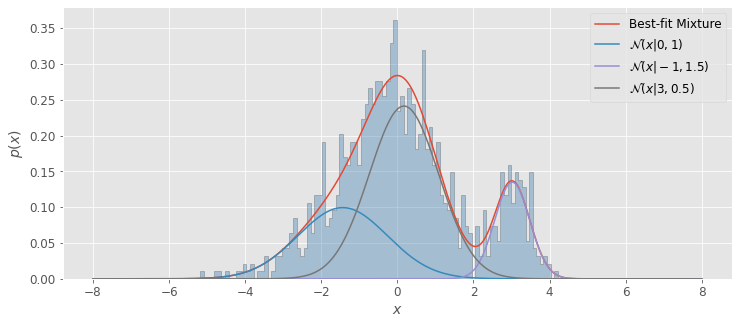

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')


fig = plt.figure(figsize=(12, 5))
x = np.linspace(-8, 8, 1000)

M_best = models[np.argmin(AIC)] 
logprob = M_best.score_samples(x.reshape(-1, 1))
responsibilities = M_best.predict_proba(x.reshape(-1, 1))
pdf = np.exp(logprob)
pdf_individual = responsibilities * pdf[:, np.newaxis]

labels = ['Best-fit Mixture','$\mathcal{N}(x|0,1)$',
          '$\mathcal{N}(x|-1,1.5)$','$\mathcal{N}(x|3,0.5)$']

plt.hist(X, 100, density=True, histtype='stepfilled', 
        alpha=0.4,color = 'steelblue',edgecolor = 'black')

#Plot the Gaussian mixture
plt.plot(x, pdf, label = labels[0])

#Plot the individual Gaussians
for i, j in enumerate([1,2,3]):
    plt.plot(x,pdf_individual[:,i],label = labels[j])
    

plt.xlabel('$x$', fontsize = 14)
plt.ylabel('$p(x)$', fontsize = 14)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(fontsize = 12);

Additionally, we'll first plot the model selection criteria (the AIC and BIC) as a function of the number of components (left panel). We'll find that both the AIC and BIC are minimized for a three-component model. We'll then plot the probability that a given point is drawn from each class as a function of its position (right panel), with the vertical extent of each region proportional to this class probability."

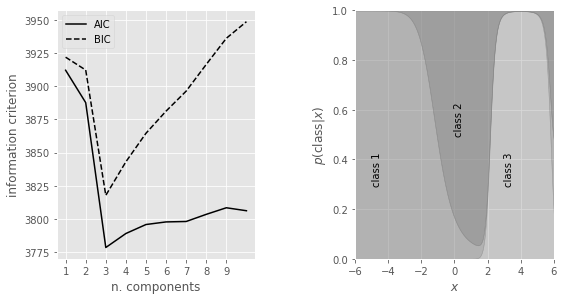

In [3]:
fig = plt.figure(figsize=(13, 5))
fig.subplots_adjust(left=0.12, right=0.97,
                    bottom=0.21, top=0.9, wspace=0.5)

# plot 2: AIC and BIC
ax = fig.add_subplot(132)

ax.plot(N, AIC, '-k', label='AIC')
ax.plot(N, BIC, '--k', label='BIC')

ax.set_xticks(np.arange(1,10,1))
ax.set_xlabel('n. components')
ax.set_ylabel('information criterion')
ax.legend(loc=2)

# plot 3: posterior probabilities for each component
ax = fig.add_subplot(133)

p = responsibilities
p = p[:, (1, 0, 2)]  # rearrange order so the plot looks better
p = p.cumsum(1).T

ax.fill_between(x, 0, p[0], color='gray', alpha=0.3)
ax.fill_between(x, p[0], p[1], color='gray', alpha=0.5)
ax.fill_between(x, p[1], 1, color='gray', alpha=0.7)
ax.set_xlim(-6, 6)
ax.set_ylim(0, 1)
ax.set_xlabel('$x$')
ax.set_ylabel(r'$p({\rm class}|x)$')

ax.text(-5, 0.3, 'class 1', rotation='vertical')
ax.text(0, 0.5, 'class 2', rotation='vertical')
ax.text(3, 0.3, 'class 3', rotation='vertical')

plt.show;

##### Useful SciPy functions

Once we fit a model to our data, SciPy has a ton of very helpful functions; to name a few, we can call `means_`, `covariances_` and `weights` to find $\mu_j$, $\sigma_j$, and $\alpha_j$.

In [4]:
len = [0,1,2]
means = [(round(float(models[2].means_[i]),3)) for i in len]
covariances = [(round(float(models[2].covariances_[i]),3)) for i in len]
weights = [(round(float(models[2].weights_[i]),3)) for i in len]

print(f"""means = {means} 
covariances = {covariances}
weights = {weights}""")

means = [-1.437, 3.019, 0.173] 
covariances = [1.377, 0.213, 0.832]
weights = [0.293, 0.156, 0.551]


###### How to choose the number of classes?

What if the number of Gaussian components was unknown? Using the model selection methods discussed in §4.3, we can find the optimal $M$ for a mixture model; this includes the Akaike information criterion (AIC) and the Bayesian information criterion (BIC). To find this value that minimizes the AIC and BIC, we create and evaluate multiple models with different numbers of components using `sklearn.mixture.GaussianMixture`. After this, we can call `m.aic(X)` or `m.bic(X)`, where $X$ is our Gaussian mixture and $m$ is our model.

In our example above, we see that as $M$ is increased, the model improves until its minimum at $M = 3$; after this, increasing $M$ worsens the model. Since we already knew $M = 3$, this provides a good sanity check that the AIC and BIC are accurately choosing the optimal number of classes.

##### The EM algorithm as a classification tool

The right panel in our example above shows the class probability for the optimal model ($M$ = 3) as a function of x (eq. $(2)$). These results can be used to probabilistically assign all measured values $\{xi\}$ to one of the three classes (mixture components). We cannot deterministically assign a class to each data point because there are unknown hidden parameters.

Results analogous to our example above can be obtained in multidimensional cases, where the mixture involves multivariate Gaussian distribution. Here too, an optimal model can be used to assign a probabilistic classification to each data point, and this and other classification methods are discussed in detail in chapter 9.

##### How to account for measurement errors?
So far, we have assumed that measurement error's for $\{x_i\}$are negligible when compared to the smallest component width, $\sigma_j$.
However, this assumption is often not acceptable; often, the best fit $\sigma_j$  that are "broadened" by measurement errors are biased estimates of the "intrinsic widths (e.g., when measuring the widths of spectral lines). How can we account for errors in $x_i$, given as $e_i$?

We'll focus our discussion on Gaussian mixtures, and assume that the measurement errors follow Gaussian distributions with standard deviations $e_i$. In the case of **homoscedastic** error where all $e_i = e$, we can rely on the fact that the convolution of two Gaussians is a Gaussian and obtain "intrinsic "widths

$$\sigma^*_j = (\sigma_j^2 - e^2)^{1 / 2}.$$

This correction procedure fails in the **heteroscedastic** case. Additionally, due to uncertainties in the best-fit values, it's possible that the best-fit value of $\sigma_j$ may turn out to be smaller than $e$.

A remedy is to account for measurement errors already in the model description: we can replace $\sigma_j$ in eq. $(1)$ by $(\sigma_j^2 + e_i^2)^{1/2}$, where the $\sigma_j$ now correspond to the intrinsic widths of each class. However, these new class pdfs **do not admit simple explicit prescriptions for the maximization step given by Eqs. 4 – 5 since the Gaussian has a different width for each $x_i$**

Following the same derivation steps, the new prescriptions for the M-step are now

$$\mu_j = \frac{\sum^N_{i=1} \frac{w_{ij}}{\sigma_j^2 +e_i^2} x_i}{\sum^N_{i=1} \frac{w_{ij}}{\sigma_j^2 +e^2_i}} $$

and

$$\qquad \qquad \sum^N_{i=1} \frac{w_{ij}}{\sigma_j^2 - e_i^2} = \sum^N_{i=1} \frac{w_{ij}}{(\sigma^2_j + e^2_i)^2} (x_i - \mu_j)^2. \qquad \qquad (7)$$


Compared to Eqs. 4 – 5, $\sigma_j$ is now "coupled" to $e_i$ and cannot be moved outside of the sum, which prevents a few cancelations that led to simple forms when $e_i = 0$. Update rules for $\mu_j$ and $\alpha_j$ are still explicit and would require only a minor modification of specific implementation. The main difficulty, which prevents the use of standard EM routines for performing the M-step, is eq. $7$, because the update rule for $\sigma_j$ is not explicit anymore. Nevertheless, it still provides a rule for updating $\sigma_j$, which can be found by numerically solving eq. $7$.

##### Non-Gaussian mixture models

The EM algorithm is not confined to Gaussian mixtures. As eq. $3$ shows, the basic premise of the method can be derived for any mixture model. In addition to various useful properties discussed in §3.3.2, a major benefit of Gaussian pdfs is the very simple set of explicit equations (Eqs. 4 – 6) for updating model parameters. When other pdfs are used, a variety of techniques are proposed in the literature for implementation of the maximization M-step. For cases where Gaussian mixtures are insufficient descriptors of data, we recommend consulting abundant and easily accessible literature on the various forms of the EM algorithm.